In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

## **Evaluate the node-level centralities graph-level properties**

In [5]:
from utils.evaluation import nodes_and_graph_properties
import networkx as nx
from functools import partial
from diffusion.jackson_metrics import diffusion_centrality, Godfather
from diffusion.complex_diffusion import paralell_complex_path
eigen = partial(nx.eigenvector_centrality_numpy, max_iter=1000, tol=1e-6)
degree = partial(nx.degree_centrality)
diffusion = partial(diffusion_centrality, T=10)
complex_path = partial(paralell_complex_path, T=0.5) 

names = ["degree_centrality",
         "eigenvector_centrality",
         "diffusion_centrality",
         "complex_path_centrality"]

methods = [degree, eigen, diffusion, complex_path]

lista = [["AttributedGraphDataset","facebook"],
         ["AttributedGraphDataset","wiki"],
         ["Twitch", "ES"]]
         
for ttype, name in lista:
    node_level, graph_level = nodes_and_graph_properties(ttype, name, method_list=methods, method_names=names, save=False)


Gini Index: 100%|███████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3627.51it/s]


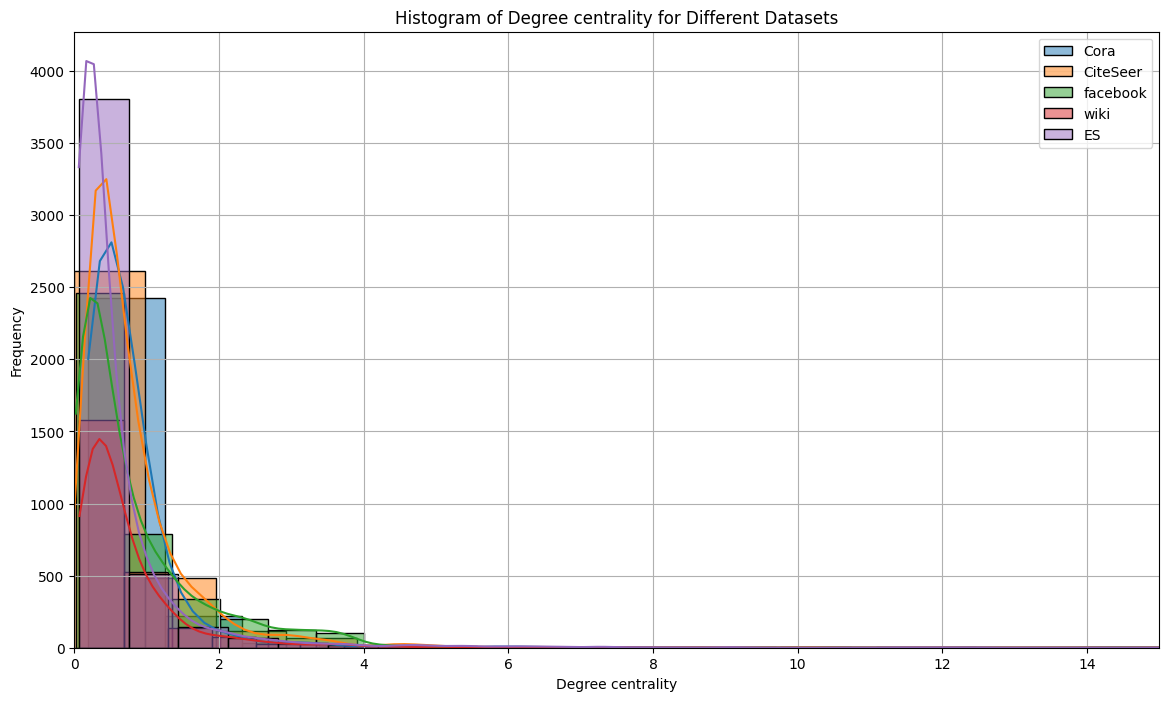

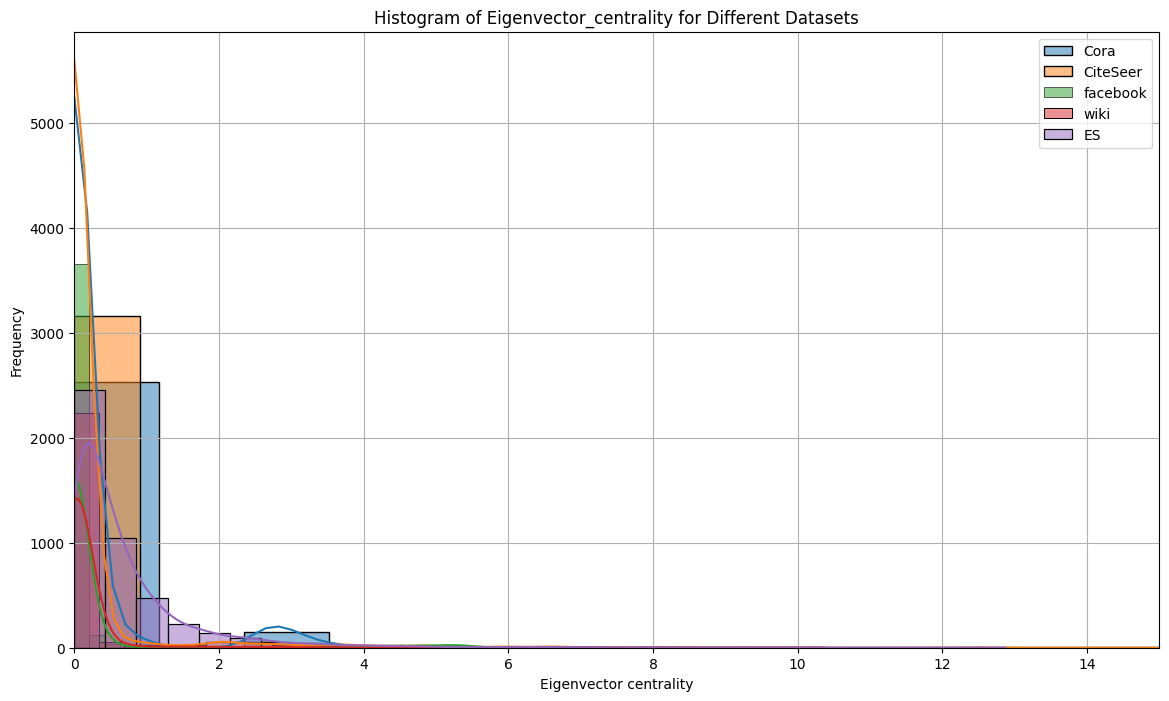

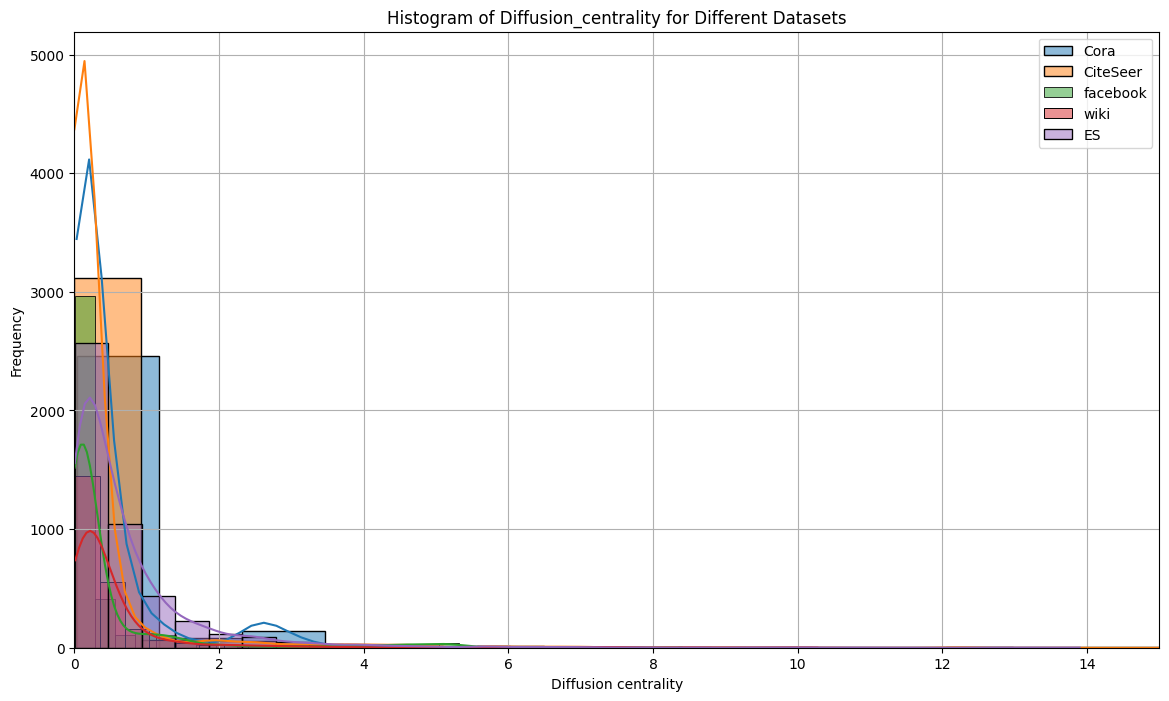

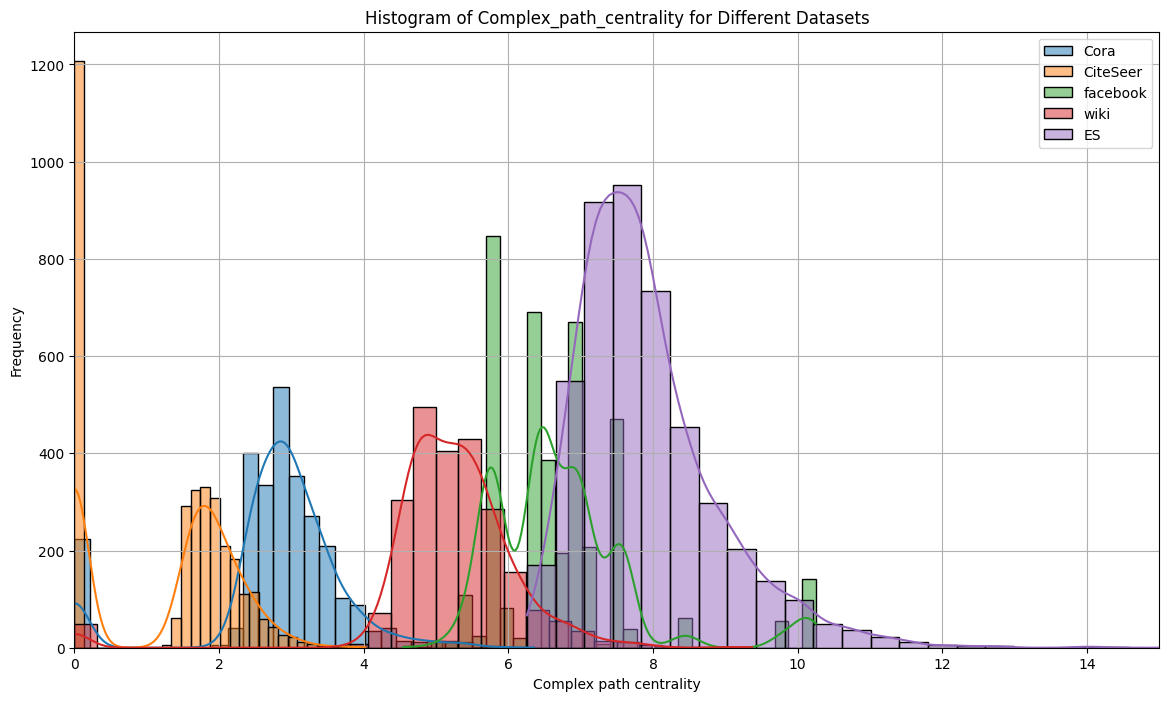

Summary Statistics for Cora:
                          count      mean  std           min       25%  \
degree centrality        2708.0  0.745504  1.0  1.912491e-01  0.382498   
eigenvector_centrality   2708.0  0.256960  1.0 -9.039854e-07  0.000282   
diffusion_centrality     2708.0  0.476010  1.0  3.083966e-02  0.101435   
complex_path_centrality  2708.0  2.805845  1.0  0.000000e+00  2.544403   

                              50%       75%        max  
degree centrality        0.573747  0.956245  32.129842  
eigenvector_centrality   0.004303  0.051986  35.151029  
diffusion_centrality     0.210329  0.414974  34.366932  
complex_path_centrality  2.904421  3.289394   6.351820  


Summary Statistics for CiteSeer:
                          count      mean  std           min           25%  \
degree centrality        3327.0  0.809263  1.0  0.000000e+00  2.957402e-01   
eigenvector_centrality   3327.0  0.199068  1.0 -3.576015e-08  7.950660e-10   
diffusion_centrality     3327.0  0.341619  1.0

In [1]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

# File paths for datasets
data_path = "data/node_level_centralities"
datasets = ["Cora.csv", "CiteSeer.csv", "facebook.csv", "wiki.csv", "ES.csv"]

# Load each dataset into a dictionary of DataFrames
dataframes = {dataset.split('.')[0]: pd.read_csv(os.path.join(data_path, dataset)) for dataset in datasets}

# Centrality measures to plot
centrality_measures = ["degree centrality", "eigenvector_centrality", "diffusion_centrality", "complex_path_centrality"]

# Plot histograms for each centrality measure across all datasets
def plot_histograms(dataframes, centrality_measures):
    for measure in centrality_measures:
        plt.figure(figsize=(14, 8))
        for name, df in dataframes.items():
            sns.histplot(df[measure], kde=True, label=name, alpha=0.5, bins=30)
        plt.title(f"Histogram of {measure.capitalize()} for Different Datasets")      
        plt.xlim([0, 15])
        plt.xlabel(f"{measure.replace('_', ' ').capitalize()}")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot histograms
plot_histograms(dataframes, centrality_measures)

# Compute summary statistics
def compute_summary_statistics(dataframes, centrality_measures):
    summary_stats = {}
    for name, df in dataframes.items():
        summary_stats[name] = df[centrality_measures].describe().transpose()
    return summary_stats

# Display summary statistics for each dataset
summary_stats = compute_summary_statistics(dataframes, centrality_measures)
for name, stats in summary_stats.items():
    print(f"Summary Statistics for {name}:")
    print(stats)
    print("\n")


## **Evaluate Graph-Level Properties**

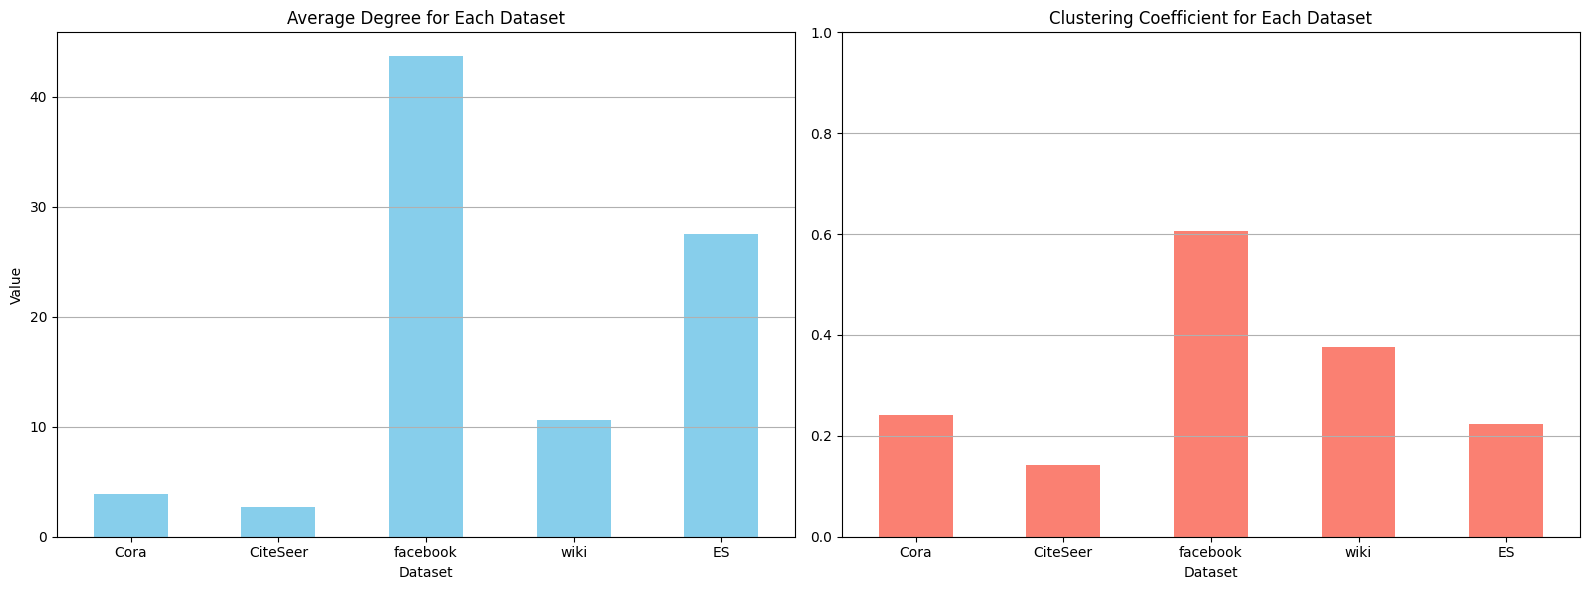

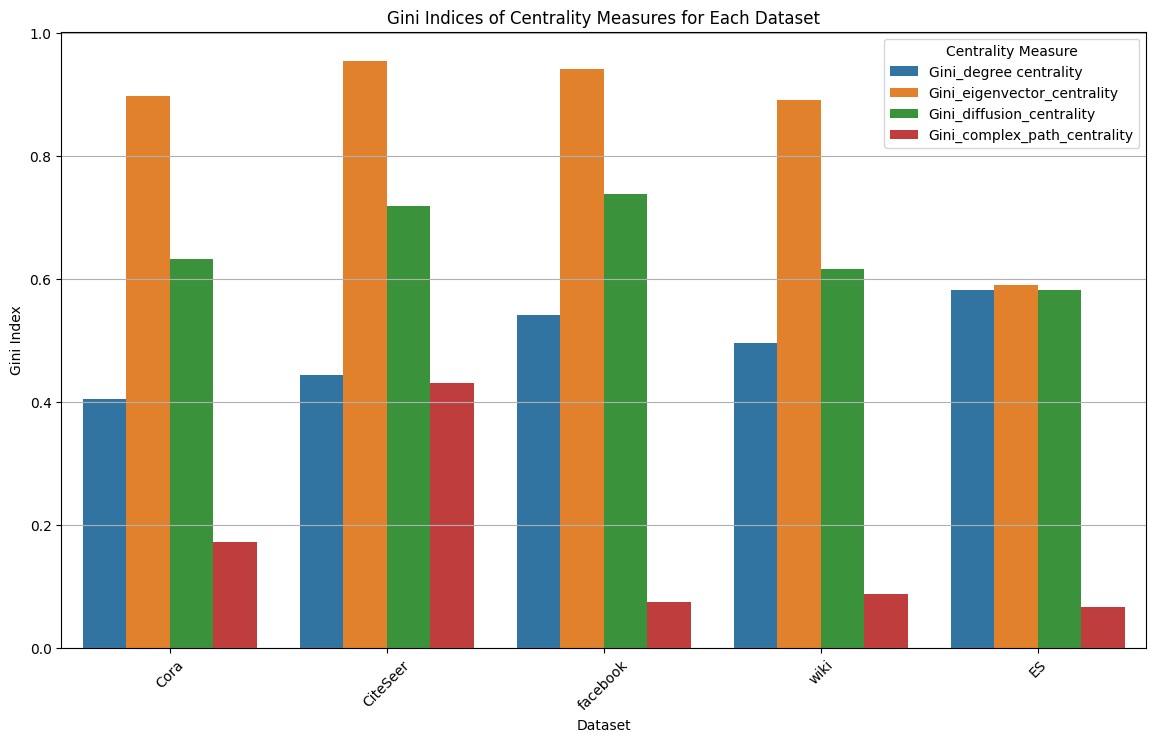

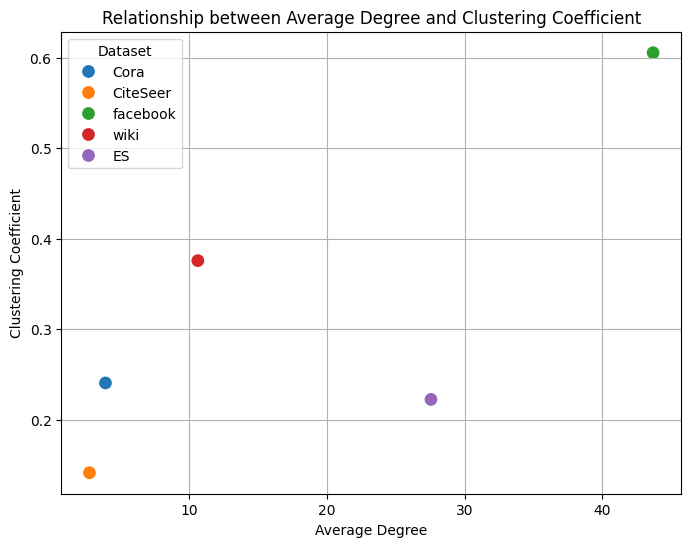

In [1]:
from utils.evaluation import graph_level_plot

# File paths for graph-level properties
data_path = "data/graph_level_properties"
datasets = ["Cora", "CiteSeer", "facebook", "wiki", "ES"]

properties = graph_level_plot(data_path, datasets, plot=True)

